<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Discount      119 non-null    float64       
 1   Amount        119 non-null    float64       
 2   Order Date    119 non-null    datetime64[ns]
 3   Ship Country  119 non-null    object        
 4   Ship City     119 non-null    object        
 5   Customer      119 non-null    object        
 6   Quantity      119 non-null    int64         
 7   Unit Price    119 non-null    float64       
 8   Category      119 non-null    object        
 9   Product       119 non-null    object        
 10  Order ID      119 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 10.4+ KB


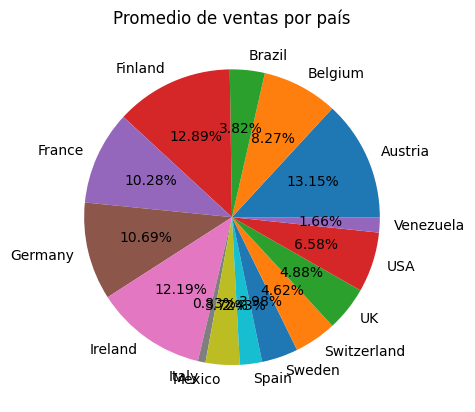

Conseguido con éxito


In [1]:
#Leer de este fichero de excel guardado
import pandas as pd

fichero = r"C:\Users\geb_b\Downloads\Practica 1.xlsx"
PedidosA = pd.read_excel(fichero, sheet_name='Pedidos A')
PedidosA.info()


PedidosA["Amount net"] = round(PedidosA["Amount"]-PedidosA["Discount"],2)
#Agrupar por Ship Country
PedidosAagroup = PedidosA.groupby(["Ship Country"])["Amount net"].mean()
PedidosAagroup = pd.DataFrame(PedidosAagroup,  columns=["Amount net"])
#Convertir el category en un campo, generando los índices del dataframe con reset_index
PedidosAagroup = PedidosAagroup.reset_index()
PedidosAagroup["Amount net"] = round(PedidosAagroup["Amount net"],2)
#Cambiar el nombre de la columna Amount net por Promedio Amount net
PedidosAagroup = PedidosAagroup.rename(columns={"Amount net":"Mean Amo Net"})
PedidosAagroup
#Guardar el dataframe agrupado en un csv
ruta = r"C:\Users\geb_b\Downloads"
fichero2 = r"\Ship Country Amount Net.csv"
PedidosAagroup.to_csv(ruta + fichero2, sep=",", index=True)
#El gráfico circular
#Llamar a la clase pyplot de matplotlib
import matplotlib.pyplot as plt
#primero tengo que crear la figura, reservar espacio en el kernel
fig, grafico = plt.subplots()
#el gráfico circular (de quesitos), es el gráfico pie, el primer parámetro es la métrica, y las dimensiones van en el label
# como ver el porcentaje % con autopct "%.2f%%"
grafico.pie(PedidosAagroup["Mean Amo Net"], labels=PedidosAagroup["Ship Country"], autopct="%.2f%%")
#Añadir título
grafico.set_title("Promedio de ventas por país")
plt.show()
print("Conseguido con éxito")   






PRACTICA 2: aprovechando el dataframe que contiene las categorías seafood + beverages, crear un dataframe que contenga la suma de amount por ship country (necesitamos agrupar) añadiédole una columna que me muestre el % de cada category con respecto a la suma total de Amount.

In [4]:
#Agrupar por Ship Country
PedidosAagroup = PedidosA.groupby(["Ship Country"])["Amount"].sum()
PedidosAagroup = pd.DataFrame(PedidosAagroup,  columns=["Amount"])
#Convertir el category en un campo, generando los índices del dataframe con reset_index
PedidosAagroup = PedidosAagroup.reset_index()
PedidosAagroup
suma = PedidosAagroup["Amount"].sum()
suma = round(suma,2)
PedidosAagroup["Porcentaje"] = (PedidosAagroup["Amount"] / suma) * 100
print(PedidosAagroup["Porcentaje"].sum())
PedidosAagroup

100.0


,Ship Country,Amount,Porcentaje
0,Austria,2102.8,4.954421
1,Belgium,441.6,1.040457
2,Brazil,2601.8,6.130118
3,Finland,4128.0,9.726008
4,France,1104.0,2.601142
5,Germany,16654.0,39.238601
6,Ireland,1952.0,4.599120
7,Italy,129.6,0.305351
8,Mexico,3360.4,7.917461
9,Spain,1405.2,3.310801
